# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

#print(weather_api_key)

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 575


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Testing: looking at json response data using ONE city first (ignore this cell)

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create endpoint URL with each city
city_url = url + "appid=" + weather_api_key +"&q=buchanan"
#city_url

city_weather = requests.get(city_url).json()
print(city_weather)

#city_lat = city_weather["coord"]["lat"]
#city_lat

test_city_df = pd.DataFrame({"city" : cities})
test_city_df.head()

{'coord': {'lon': -10.0467, 'lat': 5.8808}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 299.12, 'feels_like': 299.12, 'temp_min': 299.12, 'temp_max': 299.12, 'pressure': 1010, 'humidity': 83, 'sea_level': 1010, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 2.95, 'deg': 167, 'gust': 3.8}, 'clouds': {'all': 93}, 'dt': 1670188286, 'sys': {'country': 'LR', 'sunrise': 1670135794, 'sunset': 1670178269}, 'timezone': 0, 'id': 2278158, 'name': 'Buchanan', 'cod': 200}


,city
0,sur
1,cabo san lucas
2,ushuaia
3,port elizabeth
4,bud


In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Parameter to retrieve temperature in Celsius
units = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&units=" + units +"&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sur
Processing Record 2 of Set 1 | cabo san lucas
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | bud
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | chabahar
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | san carlos de bariloche
Processing Record 13 of Set 1 | cockburn town
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | hilo
Processing Record 16 of Set 1 | acapulco
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | rikitea

Processing Record 38 of Set 4 | zhangye
Processing Record 39 of Set 4 | goderich
Processing Record 40 of Set 4 | klooga
Processing Record 41 of Set 4 | chaa-khol
City not found. Skipping...
Processing Record 42 of Set 4 | tigil
Processing Record 43 of Set 4 | lagoa
Processing Record 44 of Set 4 | marsh harbour
Processing Record 45 of Set 4 | juba
Processing Record 46 of Set 4 | dikson
Processing Record 47 of Set 4 | alice springs
Processing Record 48 of Set 4 | touros
Processing Record 49 of Set 4 | marsa matruh
Processing Record 0 of Set 5 | kamenskoye
City not found. Skipping...
Processing Record 1 of Set 5 | eidfjord
Processing Record 2 of Set 5 | klaksvik
Processing Record 3 of Set 5 | yar-sale
Processing Record 4 of Set 5 | ulladulla
Processing Record 5 of Set 5 | novo aripuana
Processing Record 6 of Set 5 | mount isa
Processing Record 7 of Set 5 | bandundu
Processing Record 8 of Set 5 | eyl
Processing Record 9 of Set 5 | coihueco
Processing Record 10 of Set 5 | te anau
Processing

Processing Record 29 of Set 8 | nizhneyansk
City not found. Skipping...
Processing Record 30 of Set 8 | piranhas
Processing Record 31 of Set 8 | moindou
Processing Record 32 of Set 8 | nalut
Processing Record 33 of Set 8 | manikpur
Processing Record 34 of Set 8 | longhua
Processing Record 35 of Set 8 | hirara
Processing Record 36 of Set 8 | qaqortoq
Processing Record 37 of Set 8 | xingyi
Processing Record 38 of Set 8 | kamensk-uralskiy
Processing Record 39 of Set 8 | gamarra
Processing Record 40 of Set 8 | kasempa
Processing Record 41 of Set 8 | iguai
Processing Record 42 of Set 8 | zaozerne
Processing Record 43 of Set 8 | ijaki
City not found. Skipping...
Processing Record 44 of Set 8 | lubango
Processing Record 45 of Set 8 | luganville
Processing Record 46 of Set 8 | bilma
Processing Record 47 of Set 8 | batticaloa
Processing Record 48 of Set 8 | mombasa
Processing Record 49 of Set 8 | yulara
Processing Record 0 of Set 9 | amahai
Processing Record 1 of Set 9 | karkaralinsk
City not f

Processing Record 18 of Set 12 | mana
Processing Record 19 of Set 12 | waipawa
Processing Record 20 of Set 12 | san quintin
Processing Record 21 of Set 12 | nea kerasia
Processing Record 22 of Set 12 | karasjok
Processing Record 23 of Set 12 | vavoua
Processing Record 24 of Set 12 | teya
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns=["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"])

# Show Record Count
city_data_df.count()

City          530
Lat           530
Lng           530
Max Temp      530
Humidity      530
Cloudiness    530
Wind Speed    530
Country       530
Date          530
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sur,22.5667,59.5289,23.28,58,0,2.43,OM,1670188416
1,cabo san lucas,22.8909,-109.9124,29.61,61,0,2.06,MX,1670188272
2,ushuaia,-54.8000,-68.3000,11.79,76,40,9.26,AR,1670188298
3,port elizabeth,-33.9180,25.5701,18.39,99,100,0.89,ZA,1670188336
4,bud,39.4470,-86.1758,5.97,37,3,3.04,US,1670187946


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sur,22.5667,59.5289,23.28,58,0,2.43,OM,1670188416
1,cabo san lucas,22.8909,-109.9124,29.61,61,0,2.06,MX,1670188272
2,ushuaia,-54.8000,-68.3000,11.79,76,40,9.26,AR,1670188298
3,port elizabeth,-33.9180,25.5701,18.39,99,100,0.89,ZA,1670188336
4,bud,39.4470,-86.1758,5.97,37,3,3.04,US,1670187946


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

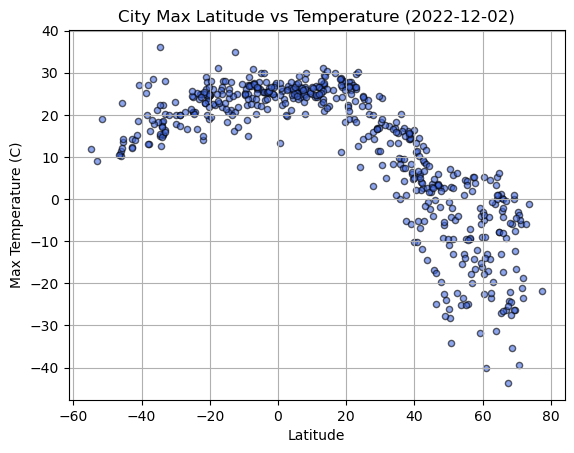

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot("Lat","Max Temp",kind="scatter", title="City Max Latitude vs Temperature (2022-12-02)", xlabel = "Latitude", ylabel = "Max Temperature (C)", grid=True,  c="royalblue", edgecolors="black", alpha=0.60)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

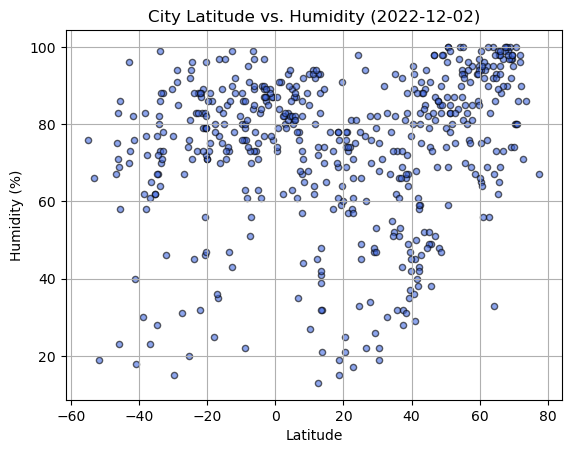

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot("Lat","Humidity",kind="scatter", title="City Latitude vs. Humidity (2022-12-02)", xlabel = "Latitude", ylabel = "Humidity (%)", grid=True,  c="royalblue", edgecolors="black", alpha=0.60)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

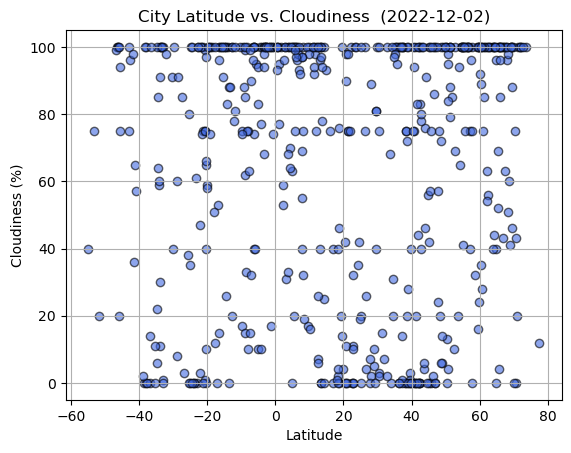

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_series = city_data_df["Lat"]
y_series = city_data_df["Cloudiness"]

plt.scatter(x_series, y_series, marker="o", c="royalblue", edgecolors="black", alpha=0.60)

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness  (2022-12-02)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

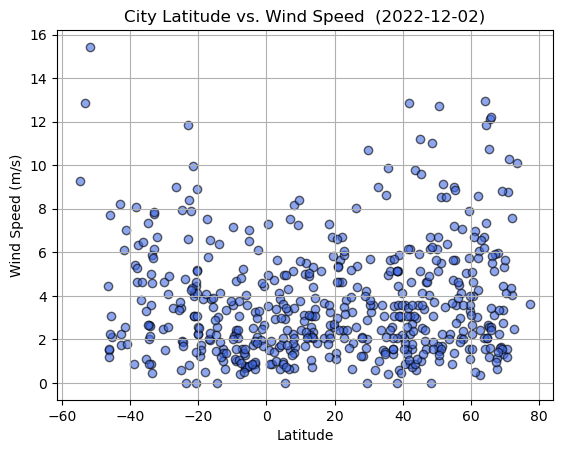

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_series = city_data_df["Lat"]
y_series = city_data_df["Wind Speed"]

plt.scatter(x_series, y_series, marker="o", c="royalblue", edgecolors="black", alpha=0.60)

# Incorporate the other graph properties
plt.grid(True)
plt.title('City Latitude vs. Wind Speed  (2022-12-02)')
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [45]:
# Define a function to create Linear Regression plots

def linear_regression_plotting(x_series, y_series, annotation_x, annotation_y, y_label):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_series, y_series)

    # Get regression values
    regress_values = x_series * slope + intercept
    # print(regress_values)

    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    # print(line_eq)

    # Create Plot
    plt.scatter(x_series,y_series)
    plt.plot(x_series,regress_values,"r-")

    # Label plot and annotate the line equation
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,(annotation_x,annotation_y),fontsize=15,color="red")

    # Print r value
    print(f"The r-value is: {rvalue}")

    # Show plot
    plt.show()
    

print("Linear Regression and plotting function ready!")

Linear Regression and plotting function ready!


In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sur,22.5667,59.5289,23.28,58,0,2.43,OM,1670188416
1,cabo san lucas,22.8909,-109.9124,29.61,61,0,2.06,MX,1670188272
4,bud,39.4470,-86.1758,5.97,37,3,3.04,US,1670187946
8,chabahar,25.2919,60.6430,23.72,45,0,1.83,IR,1670188418
9,albany,42.6001,-73.9662,2.58,59,100,1.54,US,1670188320


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,11.79,76,40,9.26,AR,1670188298
3,port elizabeth,-33.9180,25.5701,18.39,99,100,0.89,ZA,1670188336
5,atuona,-9.8000,-139.0333,25.18,80,17,7.15,PF,1670188417
6,busselton,-33.6500,115.3333,15.29,70,100,5.89,AU,1670188417
7,kaitangata,-46.2817,169.8464,10.62,75,100,1.51,NZ,1670188417


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8505678608234996


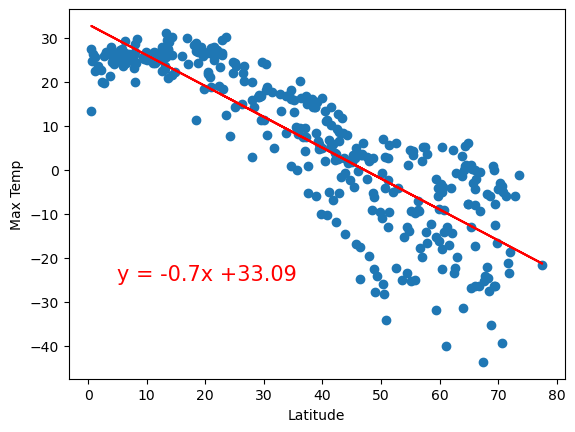

In [58]:
# Linear regression on Northern Hemisphere

# parameters for new linear regression function
x_series = northern_hemi_df["Lat"]
y_series = northern_hemi_df["Max Temp"]
annotation_x = 5
annotation_y = -25
y_label = "Max Temp"

# calling linear regression and plotting function (defined in earlier step)
linear_regression_plotting(x_series, y_series, annotation_x, annotation_y, y_label)


The r-value is: 0.6493742149519434


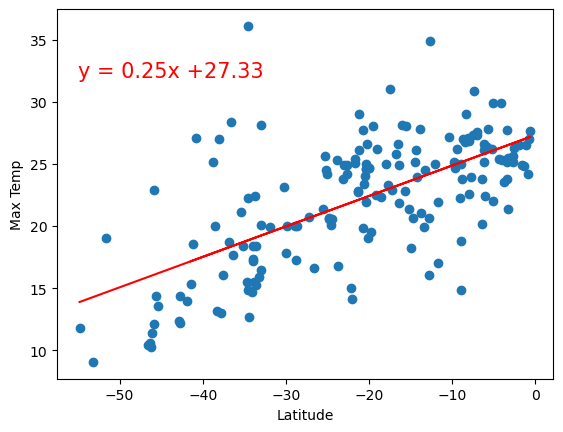

In [59]:
# Linear regression on Southern Hemisphere

# parameters for new linear regression function
x_series = southern_hemi_df["Lat"]
y_series = southern_hemi_df["Max Temp"]
annotation_x = -55
annotation_y = 32
y_label = "Max Temp"

# calling linear regression and plotting function (defined in earlier step)
linear_regression_plotting(x_series, y_series, annotation_x, annotation_y, y_label)


**Discussion about the linear relationship:** 
- Both northern and southern hemispheres graphs show as expected (visibly) that as we get closer to the equador (0 Lat) the temperatures get hotter (towards 30 degrees Celsius). 
- The R absolute value shows a strong correlation between variables for the northern hemisphere, and a moderate correlation for the southern hemisphere
- Using linear regression to predict the temperature of a place on earth given the latitude would yield pretty accurate results.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2929471535804243


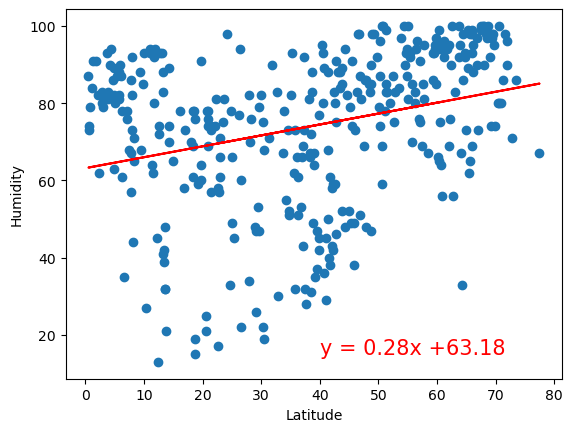

In [60]:
# Northern Hemisphere

# parameters for new linear regression function
x_series = northern_hemi_df["Lat"]
y_series = northern_hemi_df["Humidity"]
annotation_x = 40
annotation_y = 15
y_label = "Humidity"

# calling linear regression and plotting function (defined in earlier step)
linear_regression_plotting(x_series, y_series, annotation_x, annotation_y, y_label)


The r-value is: 0.30504012869705177


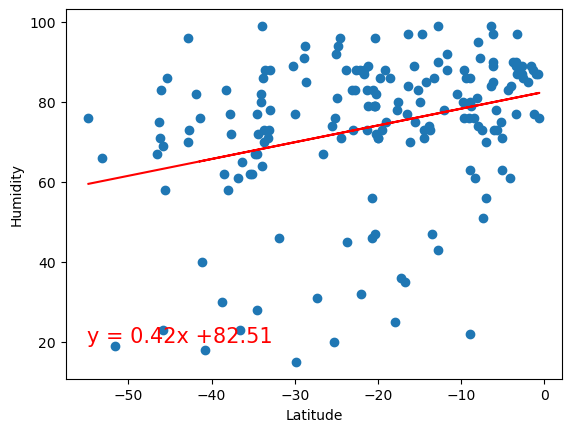

In [61]:
# Southern Hemisphere

# parameters for new linear regression function
x_series = southern_hemi_df["Lat"]
y_series = southern_hemi_df["Humidity"]
annotation_x = -55
annotation_y = 20
y_label = "Humidity"

# calling linear regression and plotting function (defined in earlier step)
linear_regression_plotting(x_series, y_series, annotation_x, annotation_y, y_label)


**Discussion about the linear relationship:** 
- The plots for both northern and southern hemispheres are all over the graph, which makes it difficult to predict the humidity for either hemisphere when given a latitude
- Both R values are very low (0.3 or below) which signifies a very weak or no existing correlation between latitude and humidity
- Using linear regression to predict humidity given a latitude is of no use

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0911454912172323


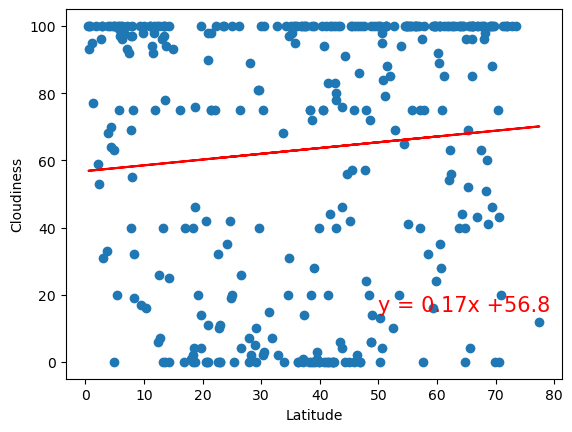

In [62]:
# Northern Hemisphere

# parameters for new linear regression function
x_series = northern_hemi_df["Lat"]
y_series = northern_hemi_df["Cloudiness"]
annotation_x = 50
annotation_y = 15
y_label = "Cloudiness"

# calling linear regression and plotting function (defined in earlier step)
linear_regression_plotting(x_series, y_series, annotation_x, annotation_y, y_label)


The r-value is: 0.19154252509776848


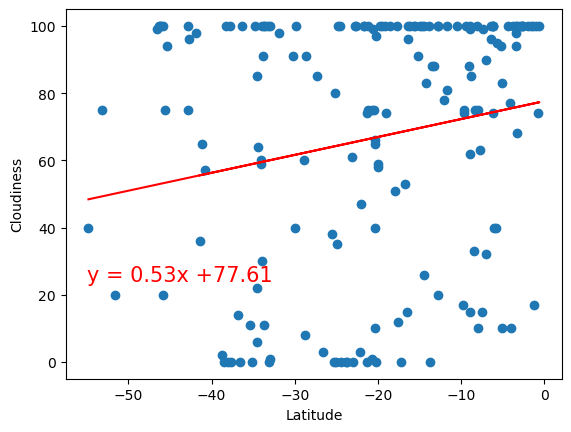

In [63]:
# Southern Hemisphere

# parameters for new linear regression function
x_series = southern_hemi_df["Lat"]
y_series = southern_hemi_df["Cloudiness"]
annotation_x = -55
annotation_y = 24
y_label = "Cloudiness"

# calling linear regression and plotting function (defined in earlier step)
linear_regression_plotting(x_series, y_series, annotation_x, annotation_y, y_label)


**Discussion about the linear relationship:** 
- Cloudiness vs latitude graphs show no visible correlation between the two variables, no pattern in any hemisphere
- R values for both hemispheres are below 0.2 signifying there is very weak or no correlation between latitude and cloudiness
- Using linear regression to predict cloudiness based on latitude is of no use


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1919302408296535


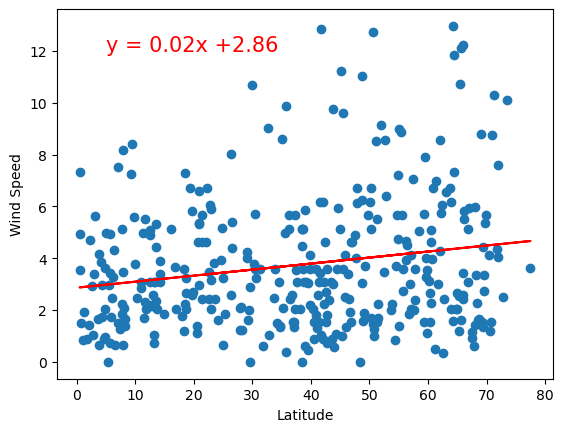

In [64]:
# Northern Hemisphere

# parameters for new linear regression function
x_series = northern_hemi_df["Lat"]
y_series = northern_hemi_df["Wind Speed"]
annotation_x = 5
annotation_y = 12
y_label = "Wind Speed"

# calling linear regression and plotting function (defined in earlier step)
linear_regression_plotting(x_series, y_series, annotation_x, annotation_y, y_label)


The r-value is: -0.35919512640072954


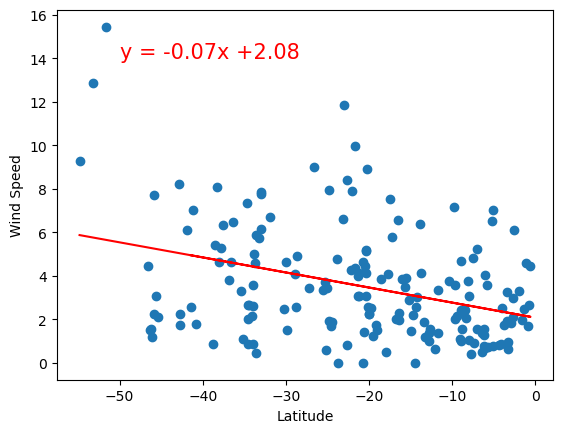

In [65]:
# Southern Hemisphere

# parameters for new linear regression function
x_series = southern_hemi_df["Lat"]
y_series = southern_hemi_df["Wind Speed"]
annotation_x = -50
annotation_y = 14
y_label = "Wind Speed"

# calling linear regression and plotting function (defined in earlier step)
linear_regression_plotting(x_series, y_series, annotation_x, annotation_y, y_label)


**Discussion about the linear relationship:** 
- There is little to no visible correlation between Wind Speed and Latitude in any hemisphere
- The R values show that the strength of correlation is below 0.3, which means there is very weak or no correlation between wind speed and latitude
- There is basically no linear relationship.  Using linear regression to predict wind speed given a latitude is of no use.